#  Succinct statistical description - 2nd Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import scipy
from scipy.stats import spearmanr

%matplotlib inline
plt.style.use('bmh')
rcParams['figure.figsize']=5, 4
sns.set_style('whitegrid')

#### Loading the data

In [4]:
green_df = pd.read_csv("./data/green.csv")
hinsel_df = pd.read_csv("./data/hinselmann.csv")
schiller_df = pd.read_csv("./data/schiller.csv")

In [5]:
green_df.columns

Index(['cervix_area', 'os_area', 'walls_area', 'speculum_area',
       'artifacts_area', 'cervix_artifacts_area', 'os_artifacts_area',
       'walls_artifacts_area', 'speculum_artifacts_area',
       'cervix_specularities_area', 'os_specularities_area',
       'walls_specularities_area', 'speculum_specularities_area',
       'specularities_area', 'area_h_max_diff', 'rgb_cervix_r_mean',
       'rgb_cervix_r_std', 'rgb_cervix_r_mean_minus_std',
       'rgb_cervix_r_mean_plus_std', 'rgb_cervix_g_mean', 'rgb_cervix_g_std',
       'rgb_cervix_g_mean_minus_std', 'rgb_cervix_g_mean_plus_std',
       'rgb_cervix_b_mean', 'rgb_cervix_b_std', 'rgb_cervix_b_mean_minus_std',
       'rgb_cervix_b_mean_plus_std', 'rgb_total_r_mean', 'rgb_total_r_std',
       'rgb_total_r_mean_minus_std', 'rgb_total_r_mean_plus_std',
       'rgb_total_g_mean', 'rgb_total_g_std', 'rgb_total_g_mean_minus_std',
       'rgb_total_g_mean_plus_std', 'rgb_total_b_mean', 'rgb_total_b_std',
       'rgb_total_b_mean_minus_std'

In [6]:
hinsel_df.columns

Index(['cervix_area', 'os_area', 'walls_area', 'speculum_area',
       'artifacts_area', 'cervix_artifacts_area', 'os_artifacts_area',
       'walls_artifacts_area', 'speculum_artifacts_area',
       'cervix_specularities_area', 'os_specularities_area',
       'walls_specularities_area', 'speculum_specularities_area',
       'specularities_area', 'area_h_max_diff', 'rgb_cervix_r_mean',
       'rgb_cervix_r_std', 'rgb_cervix_r_mean_minus_std',
       'rgb_cervix_r_mean_plus_std', 'rgb_cervix_g_mean', 'rgb_cervix_g_std',
       'rgb_cervix_g_mean_minus_std', 'rgb_cervix_g_mean_plus_std',
       'rgb_cervix_b_mean', 'rgb_cervix_b_std', 'rgb_cervix_b_mean_minus_std',
       'rgb_cervix_b_mean_plus_std', 'rgb_total_r_mean', 'rgb_total_r_std',
       'rgb_total_r_mean_minus_std', 'rgb_total_r_mean_plus_std',
       'rgb_total_g_mean', 'rgb_total_g_std', 'rgb_total_g_mean_minus_std',
       'rgb_total_g_mean_plus_std', 'rgb_total_b_mean', 'rgb_total_b_std',
       'rgb_total_b_mean_minus_std'

In [7]:
schiller_df.columns

Index(['cervix_area', 'os_area', 'walls_area', 'speculum_area',
       'artifacts_area', 'cervix_artifacts_area', 'os_artifacts_area',
       'walls_artifacts_area', 'speculum_artifacts_area',
       'cervix_specularities_area', 'os_specularities_area',
       'walls_specularities_area', 'speculum_specularities_area',
       'specularities_area', 'area_h_max_diff', 'rgb_cervix_r_mean',
       'rgb_cervix_r_std', 'rgb_cervix_r_mean_minus_std',
       'rgb_cervix_r_mean_plus_std', 'rgb_cervix_g_mean', 'rgb_cervix_g_std',
       'rgb_cervix_g_mean_minus_std', 'rgb_cervix_g_mean_plus_std',
       'rgb_cervix_b_mean', 'rgb_cervix_b_std', 'rgb_cervix_b_mean_minus_std',
       'rgb_cervix_b_mean_plus_std', 'rgb_total_r_mean', 'rgb_total_r_std',
       'rgb_total_r_mean_minus_std', 'rgb_total_r_mean_plus_std',
       'rgb_total_g_mean', 'rgb_total_g_std', 'rgb_total_g_mean_minus_std',
       'rgb_total_g_mean_plus_std', 'rgb_total_b_mean', 'rgb_total_b_std',
       'rgb_total_b_mean_minus_std'

In [8]:
green_df.describe()

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.483894,0.007200,0.172539,0.203983,0.048934,0.020932,0.034318,0.054512,0.017360,0.007460,...,134.108838,0.452755,0.433432,0.581633,0.551020,0.418367,0.755102,0.836735,0.408163,0.683673
std,0.237138,0.005322,0.198449,0.159175,0.077082,0.050713,0.115449,0.143029,0.099000,0.014057,...,98.591018,0.221793,0.170201,0.495827,0.499947,0.495827,0.432238,0.371508,0.494021,0.467433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.110650,0.144403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344760,0.003481,0.048991,0.034908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000461,...,72.351422,0.310381,0.326850,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.451361,0.006235,0.118152,0.212374,0.014963,0.000000,0.000000,0.000000,0.000000,0.003057,...,106.472233,0.403410,0.402563,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.585041,0.010001,0.221923,0.326897,0.066564,0.006914,0.000000,0.020769,0.007808,0.007553,...,159.543694,0.546278,0.507582,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.022630,1.000000,0.603027,0.502783,0.296221,0.649788,0.765429,0.973837,0.083074,...,498.665052,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So as we can see, the dataset has 69 attributes (or variables), 7 target variables (expert::X (X in 0,...,5) and consensus).

In [9]:
hinsel_df.describe()

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.459642,0.008062,0.165060,0.244464,0.057365,0.043135,0.075018,0.040340,0.023549,0.022160,...,132.205863,0.484144,0.417081,0.85567,0.587629,0.721649,0.670103,0.845361,0.824742,0.845361
std,0.190648,0.007236,0.180984,0.173177,0.070334,0.087365,0.209429,0.096636,0.111250,0.045179,...,85.463350,0.235834,0.144031,0.35325,0.494819,0.450515,0.472618,0.363439,0.382162,0.363439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.091654,0.155274,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.334652,0.003367,0.053043,0.125968,0.000000,0.000000,0.000000,0.000000,0.000000,0.002288,...,74.164028,0.318949,0.320427,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.451290,0.006859,0.124076,0.218095,0.029923,0.007605,0.000000,0.000000,0.000000,0.005750,...,109.093948,0.443464,0.403812,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.549185,0.010496,0.218896,0.333330,0.089604,0.033335,0.017773,0.034324,0.005208,0.017614,...,169.984141,0.591671,0.501719,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.042066,0.946555,0.654104,0.279819,0.458985,1.000000,0.542977,0.897937,0.263360,...,575.369328,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So as we can see, the dataset has 69 attributes (or variables), 7 target variables (expert::X (X in 0,...,5) and consensus).

In [10]:
schiller_df.describe()

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.487998,0.006816,0.180500,0.258669,0.035116,0.031243,0.044262,0.029609,0.013802,0.013612,...,135.507571,0.502840,0.457691,0.478261,0.782609,0.608696,0.793478,0.815217,0.336957,0.728261
std,0.241246,0.005132,0.186326,0.188185,0.039314,0.028672,0.132359,0.078074,0.055141,0.018490,...,87.547892,0.257917,0.171687,0.502264,0.414731,0.490716,0.407027,0.390248,0.475260,0.447294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.095483,0.084065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353772,0.002994,0.086956,0.096900,0.008642,0.011317,0.000000,0.000000,0.000000,0.002958,...,75.041868,0.316199,0.352918,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.449878,0.006501,0.143070,0.255809,0.018637,0.023231,0.000000,0.000000,0.000000,0.008622,...,114.657050,0.460020,0.421655,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.611170,0.009455,0.216363,0.400738,0.051568,0.044440,0.006064,0.015768,0.003001,0.015575,...,173.345961,0.634760,0.550037,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.023609,1.000000,0.654780,0.239535,0.142523,0.912906,0.369644,0.419740,0.100910,...,356.792378,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So as we can see, the dataset has 69 attributes (or variables), 7 target variables (expert::X (X in 0,...,5) and consensus).

In [11]:
green_df.sample(5)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
71,0.509726,0.005414,0.000000,0.289478,0.028120,0.002172,0.000000,0.000000,0.006217,0.005822,...,81.339265,0.261065,0.356035,1.0,1.0,1.0,1.0,1.0,1.0,1.0
44,0.754141,0.007659,0.274334,0.023822,0.000000,0.000000,0.000000,0.000000,0.000000,0.002801,...,117.213165,0.396748,0.390840,1.0,1.0,1.0,1.0,1.0,1.0,1.0
83,0.627752,0.011146,0.150431,0.000000,0.166071,0.000694,0.000000,0.001008,0.000000,0.002226,...,117.590722,0.510028,0.430069,1.0,1.0,0.0,1.0,1.0,1.0,1.0
41,0.475217,0.011236,0.291568,0.158060,0.078195,0.000000,0.000000,0.011450,0.027048,0.000122,...,158.623508,0.380925,0.406250,1.0,1.0,1.0,1.0,1.0,1.0,1.0
80,0.477504,0.012723,0.536260,0.000000,0.055095,0.115381,0.209613,0.000509,0.000000,0.000892,...,159.850422,0.184236,0.213768,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
hinsel_df.sample(5)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
87,0.291223,0.015168,0.329862,0.172199,0.002900,0.009957,0.000000,0.000000,0.000000,0.005750,...,202.292510,0.335499,0.339832,1.0,1.0,1.0,0.0,1.0,1.0,1.0
32,0.775681,0.042066,0.219174,0.015186,0.000000,0.000000,0.000000,0.000000,0.000000,0.008975,...,154.142240,0.519526,0.461915,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36,0.357848,0.007298,0.057831,0.463641,0.210119,0.388420,0.000000,0.054643,0.011354,0.074909,...,89.565415,0.692124,0.506940,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30,0.483963,0.002982,0.513382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007951,...,152.151697,0.373564,0.310112,1.0,0.0,1.0,1.0,0.0,1.0,1.0
70,0.517556,0.008090,0.010969,0.299499,0.018227,0.035218,0.037973,0.000000,0.000000,0.007893,...,50.626364,0.226738,0.375307,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
schiller_df.sample(5)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
13,0.269385,0.004124,0.101847,0.209992,0.011196,0.041562,0.565243,0.000000,0.00000,0.016051,...,103.502808,0.133595,0.334012,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.560898,0.009135,0.147885,0.294300,0.005061,0.009024,0.000000,0.000000,0.00000,0.003084,...,101.926838,0.618853,0.404181,0.0,1.0,0.0,1.0,1.0,0.0,1.0
10,0.507922,0.006522,0.305198,0.029947,0.018445,0.036315,0.062671,0.000000,0.00000,0.015809,...,71.778166,0.317827,0.376923,1.0,1.0,0.0,1.0,1.0,1.0,1.0
17,0.000000,0.000000,0.495569,0.522725,0.007169,0.000000,0.000000,0.014465,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
0,0.317899,0.008975,0.142670,0.264625,0.051382,0.022907,0.000000,0.000291,0.01685,0.003351,...,178.019319,0.327891,0.486702,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 3 DATASETS

In [13]:
frames = [green_df, hinsel_df, schiller_df]
data_join= pd.concat(frames)
print(data_join)

    cervix_area   os_area  walls_area  speculum_area  artifacts_area  \
0      0.344647  0.003080    0.047522       0.288216        0.178585   
1      0.165329  0.000000    0.048236       0.504736        0.502783   
2      0.457010  0.001681    0.242888       0.212859        0.000000   
3      0.513244  0.005711    0.213781       0.251819        0.079795   
4      0.390319  0.009454    0.272884       0.373487        0.000000   
5      0.553354  0.009472    0.094315       0.000000        0.000000   
6      0.543618  0.005927    0.329241       0.086847        0.052831   
7      0.510726  0.010724    0.113227       0.211889        0.084259   
8      0.512960  0.017649    0.251531       0.178131        0.000000   
9      0.565021  0.010130    0.340475       0.033007        0.000000   
10     0.293491  0.002372    0.000000       0.430240        0.000000   
11     0.489216  0.003478    0.171965       0.057902        0.000000   
12     0.203493  0.000000    0.051256       0.301396        0.12

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

datadict = pd.DataFrame(data_join.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
datadict['MissingVal'] = data_join.isnull().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=data_join.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=data_join.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

                            DataType  MissingVal  NUnique  Count
cervix_area                  float64           0      263    287
os_area                      float64           0      256    287
walls_area                   float64           0      241    287
speculum_area                float64           0      240    287
artifacts_area               float64           0      211    287
cervix_artifacts_area        float64           0      174    287
os_artifacts_area            float64           0       66    287
walls_artifacts_area         float64           0      112    287
speculum_artifacts_area      float64           0      107    287
cervix_specularities_area    float64           0      271    287
os_specularities_area        float64           0      102    287
walls_specularities_area     float64           0      140    287
speculum_specularities_area  float64           0      192    287
specularities_area           float64           0      281    287
area_h_max_diff          

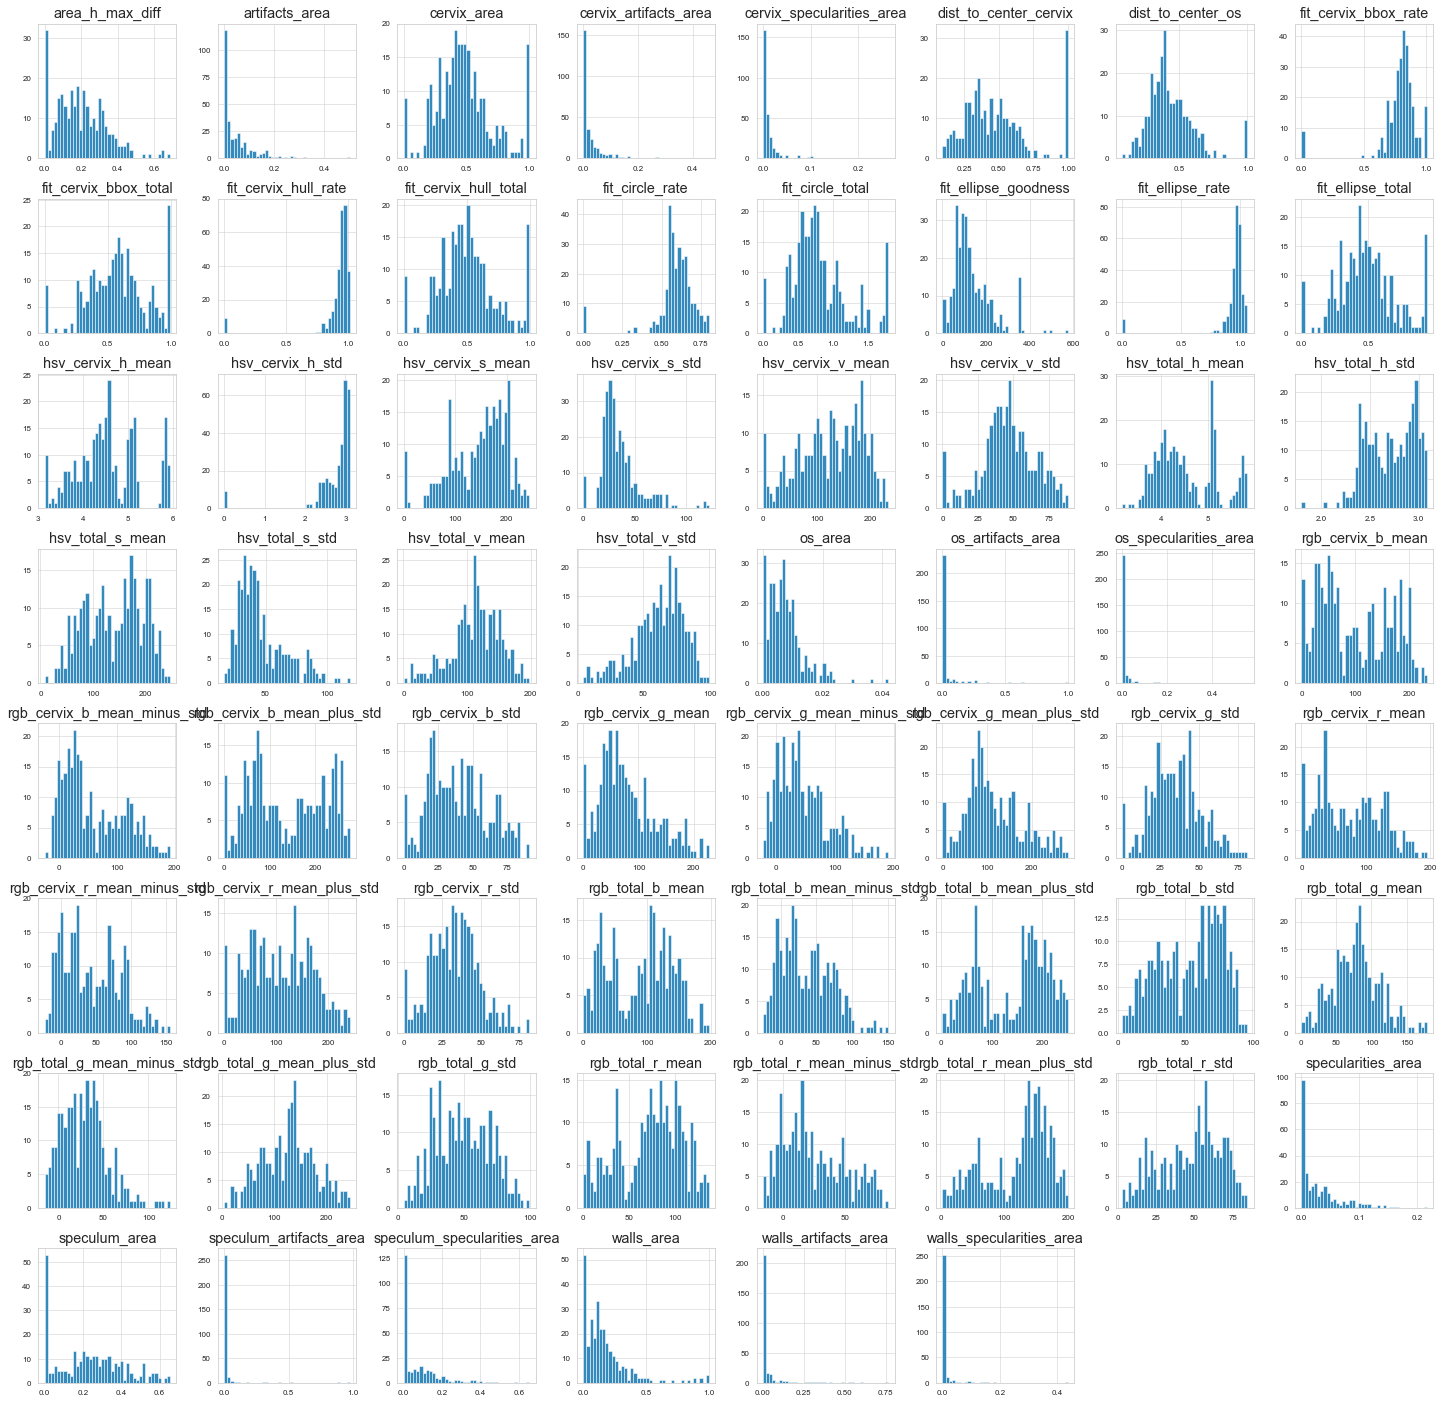

In [15]:
data_join_num = data_join.select_dtypes(include = ['float64'])
data_join_num1 = data_join_num.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'])
data_join_num1.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

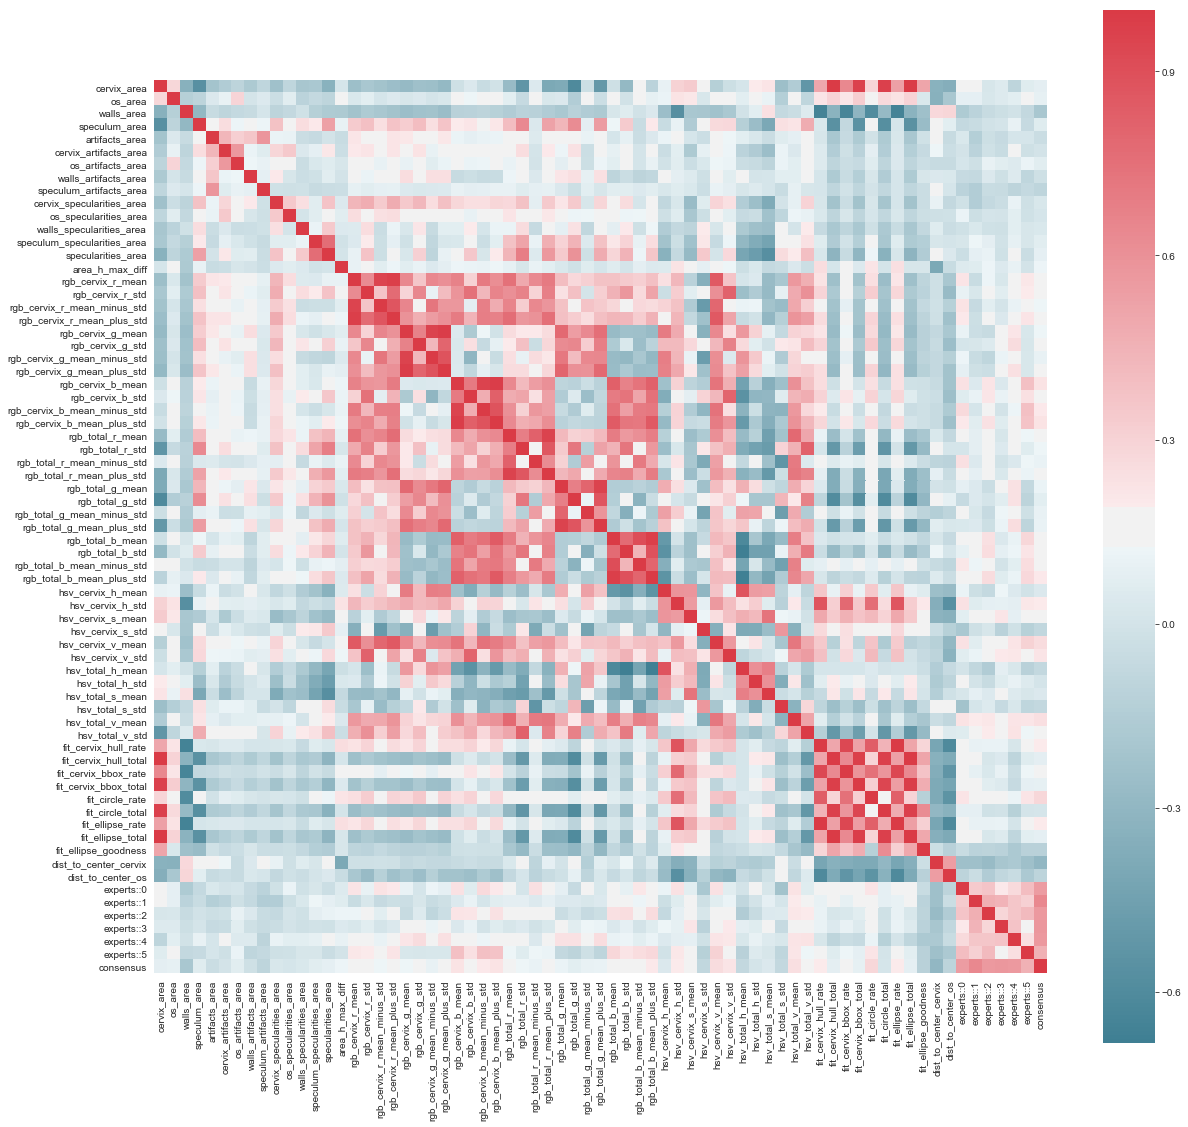

In [16]:
f, ax = plt.subplots(figsize=(20, 19))
corr = data_join.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, th):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    i=0
    while au_corr[i] > th: 
        i+=1
    return au_corr[0:i]

print (get_top_abs_correlations(data_join,0.94))

fit_cervix_hull_total  fit_ellipse_total              0.998784
cervix_area            fit_cervix_hull_total          0.995241
                       fit_ellipse_total              0.994742
fit_cervix_hull_rate   fit_ellipse_rate               0.993621
rgb_cervix_b_mean      rgb_cervix_b_mean_plus_std     0.982757
rgb_cervix_g_mean      rgb_cervix_g_mean_plus_std     0.981726
fit_cervix_bbox_total  fit_ellipse_total              0.981359
rgb_cervix_r_mean      rgb_cervix_r_mean_plus_std     0.978579
fit_cervix_hull_total  fit_cervix_bbox_total          0.978297
rgb_total_b_mean       rgb_total_b_mean_plus_std      0.977225
fit_cervix_hull_total  fit_circle_total               0.970611
cervix_area            fit_circle_total               0.967515
fit_circle_total       fit_ellipse_total              0.967500
cervix_area            fit_cervix_bbox_total          0.964851
rgb_cervix_g_mean      rgb_cervix_g_mean_minus_std    0.958596
rgb_total_r_mean       rgb_total_r_mean_plus_std      0

#### GREEN DATASET

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
datadict = pd.DataFrame(green_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
datadict['MissingVal'] = green_df.isnull().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=green_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=green_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

                            DataType  MissingVal  NUnique  Count
cervix_area                  float64           0       88     98
os_area                      float64           0       90     98
walls_area                   float64           0       80     98
speculum_area                float64           0       78     98
artifacts_area               float64           0       51     98
cervix_artifacts_area        float64           0       34     98
os_artifacts_area            float64           0       15     98
walls_artifacts_area         float64           0       37     98
speculum_artifacts_area      float64           0       35     98
cervix_specularities_area    float64           0       89     98
os_specularities_area        float64           0       25     98
walls_specularities_area     float64           0       36     98
speculum_specularities_area  float64           0       57     98
specularities_area           float64           0       94     98
area_h_max_diff          

From these informations we can already see that all the features are relevant in our exploratory analysis as there aren´t any missing values.

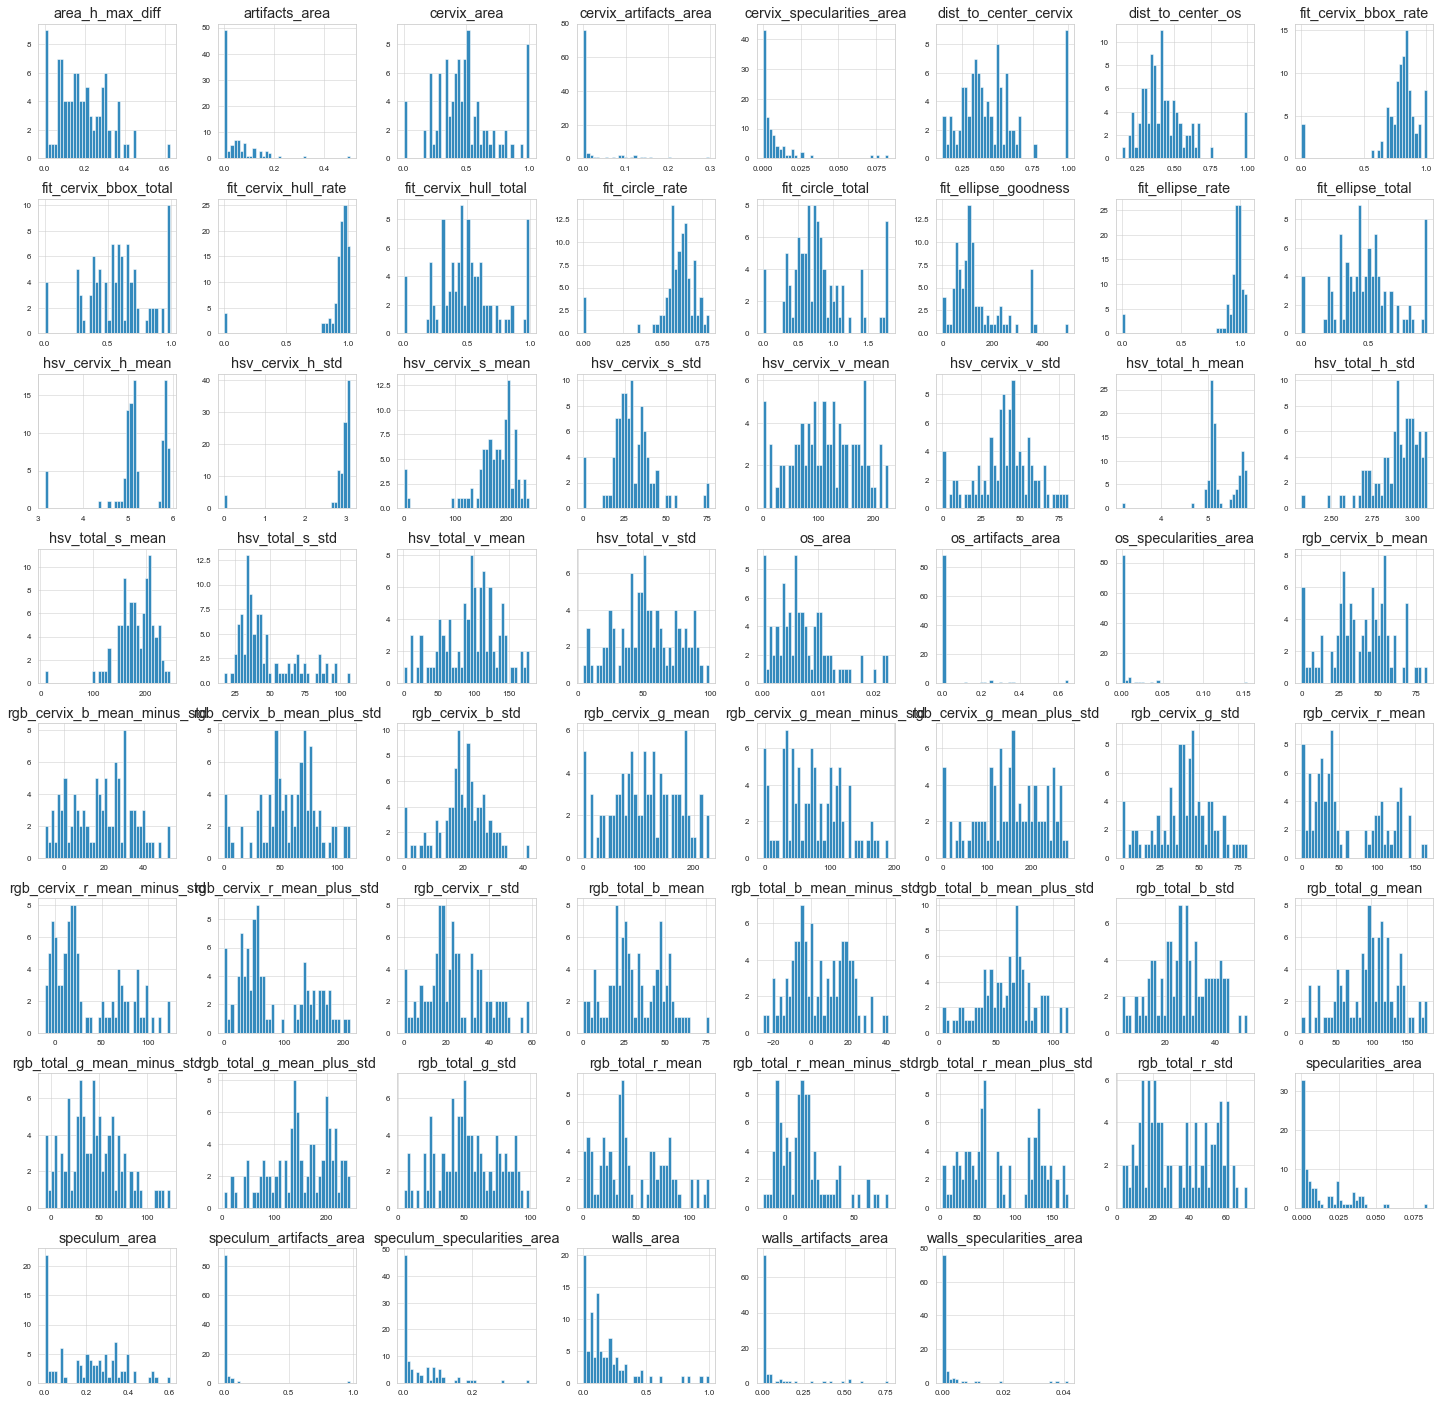

In [14]:
green_df_num = green_df.select_dtypes(include = ['float64'])
green_df_num1 = green_df_num.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'])
green_df_num1.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

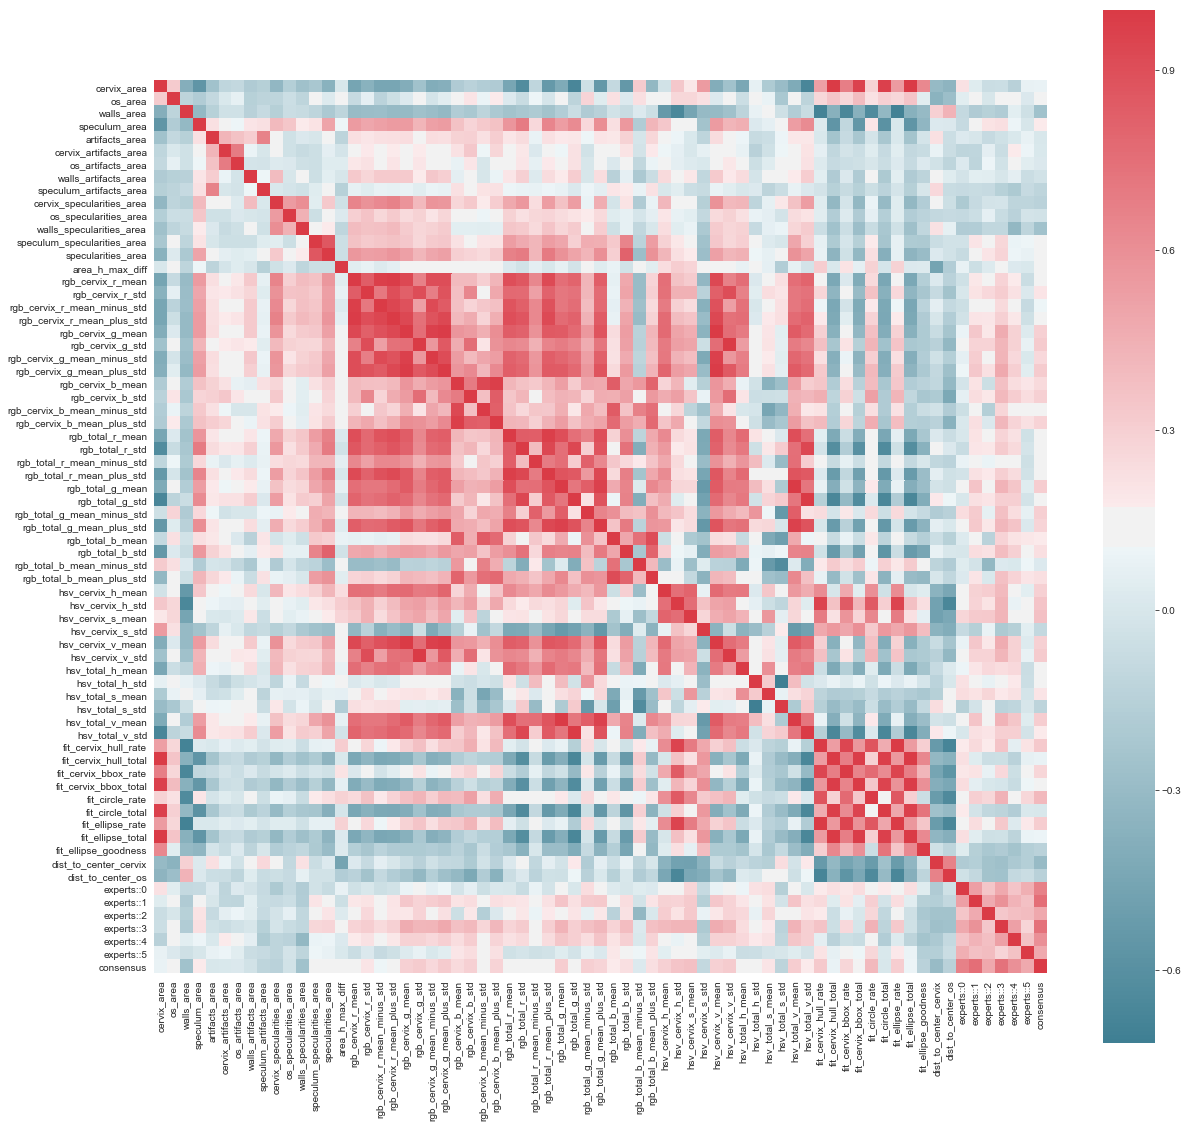

In [15]:
f, ax = plt.subplots(figsize=(20, 19))
corr = green_df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

rgb_total_g_std              hsv_total_v_std                0.999976
rgb_cervix_g_mean            hsv_cervix_v_mean              0.999957
rgb_total_g_mean             hsv_total_v_mean               0.999953
rgb_cervix_g_std             hsv_cervix_v_std               0.999904
fit_cervix_hull_total        fit_ellipse_total              0.998916
cervix_area                  fit_cervix_hull_total          0.995709
fit_cervix_hull_rate         fit_ellipse_rate               0.995354
cervix_area                  fit_ellipse_total              0.995185
rgb_cervix_r_mean            rgb_cervix_r_mean_plus_std     0.992100
rgb_cervix_g_mean_plus_std   hsv_cervix_v_mean              0.987124
rgb_cervix_g_mean            rgb_cervix_g_mean_plus_std     0.986864
fit_cervix_bbox_total        fit_ellipse_total              0.983237
fit_cervix_hull_total        fit_cervix_bbox_total          0.979919
rgb_cervix_r_mean            rgb_cervix_r_mean_minus_std    0.979301
rgb_total_r_mean             rgb_t

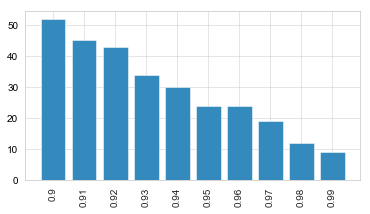

In [14]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, th):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    i=0
    while au_corr[i] > th: 
        i+=1
    return au_corr[0:i]

print (get_top_abs_correlations(green_df,0.94))

import numpy as np
import matplotlib.pyplot as plt
height = [0.9, 0.91, 0.92, 0.93, 0.94,0.95,0.96,0.97,0.98,0.99]
y_posi=[]
for i in range (len(height)):
    y_posi.append(len(get_top_abs_correlations(green_df,height[i])))

# Basic plot
bars = ('0.9', '0.91', '0.92', '0.93', '0.94','0.95','0.96','0.97','0.98','0.99')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, y_posi)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()

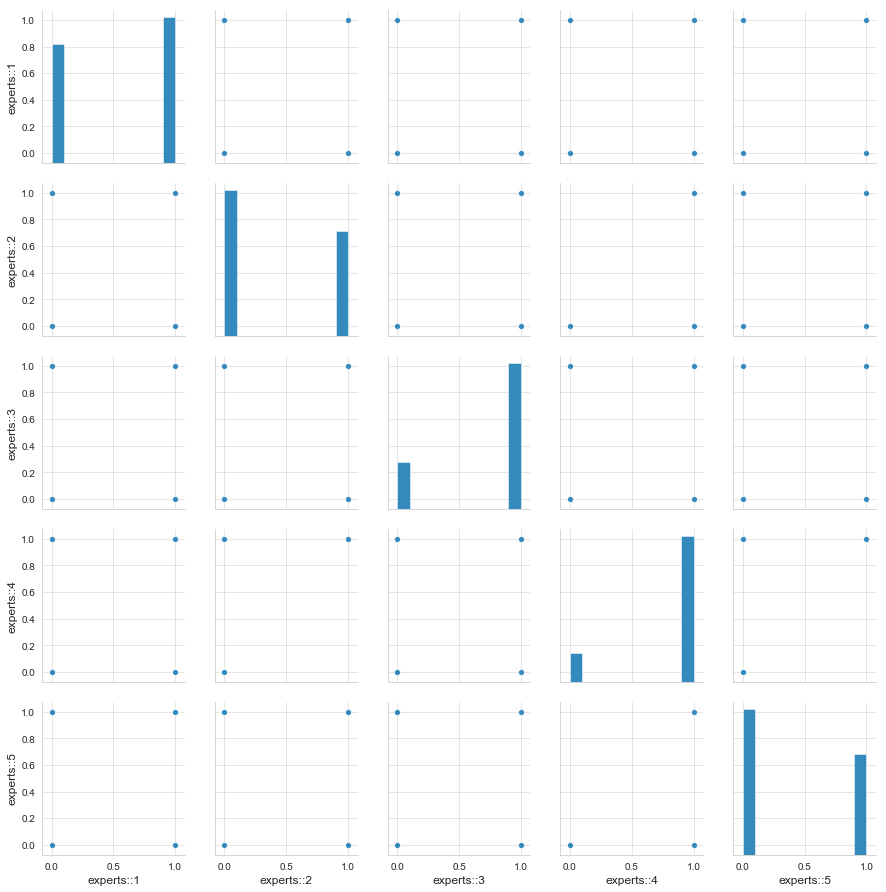

In [17]:
X=green_df [['experts::1','experts::2','experts::3','experts::4','experts::5']]
sns.pairplot(X)

Ordinal variables, numeric but able to be ranked in categories. Numeric with a set possible of variables, so the vars are ordinal.Relation between the vars, non-linea relation.Distribution of each variable non-normal

#### Spearman Rank Correlation (Green)

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

In [18]:
cons= green_df ['consensus']
exp1= green_df ['experts::1']
exp2= green_df ['experts::2']
exp3= green_df ['experts::3']
exp4= green_df ['experts::4']
exp5= green_df ['experts::5']

In [19]:
spearmanr_coefficient, p_value = spearmanr(cons,exp1)
print ('Spearman Rank Correlation(Expert 1 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 1 vs Consensus)0.754


In [20]:
spearmanr_coefficient, p_value = spearmanr(cons,exp2)
print ('Spearman Rank Correlation(Expert 2 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 2 vs Consensus)0.488


In [21]:
spearmanr_coefficient, p_value = spearmanr(cons,exp3)
print ('Spearman Rank Correlation(Expert 3 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 3 vs Consensus)0.735


In [22]:
spearmanr_coefficient, p_value = spearmanr(cons,exp4)
print ('Spearman Rank Correlation(Expert 4 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 4 vs Consensus)0.590


In [23]:
spearmanr_coefficient, p_value = spearmanr(cons,exp5)
print ('Spearman Rank Correlation(Expert 5 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 5 vs Consensus)0.476


The statistical test reports a positive correlation with values:0.754,0,488,0.735,0.590,0.476. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

#### Chi-square test for independence (Hinsel)

In [24]:
table=pd.crosstab(cons,exp1)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 52.438 p_value 0.000


In [25]:
table=pd.crosstab(cons,exp2)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 21.253 p_value 0.000


In [26]:
table=pd.crosstab(cons,exp3)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 49.356 p_value 0.000


In [27]:
table=pd.crosstab(cons,exp4)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 30.771 p_value 0.000


In [28]:
table=pd.crosstab(cons,exp5)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 20.135 p_value 0.000


P-value < 0.05 to conclude that the variables are independent of one another. Reject the null hypothesis and conclude variables are correlated.

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


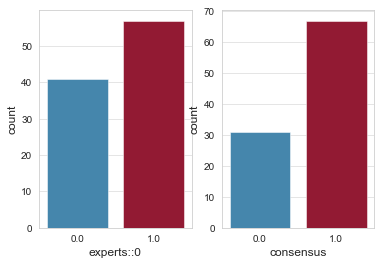

In [29]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::0', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


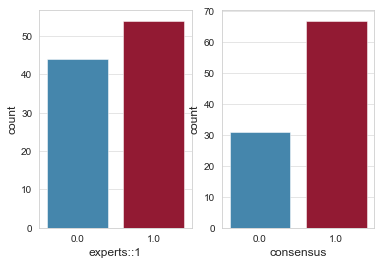

In [30]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::1', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


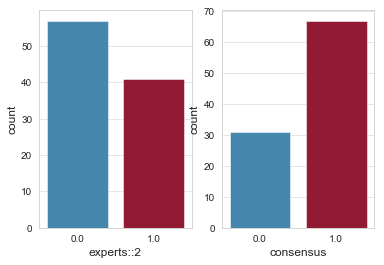

In [31]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::2', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


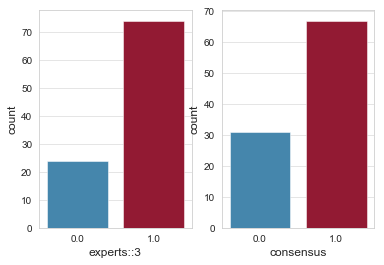

In [32]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::3', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


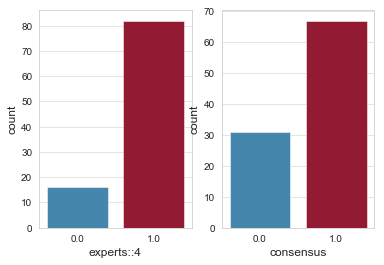

In [33]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::4', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


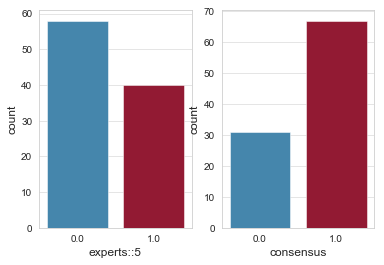

In [34]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::5', data=green_df, ax=ax[0])
sns.countplot(x='consensus', data=green_df, ax=ax[1])
fig.show()

In [35]:
green_df["experts::0"].unique()

array([1., 0.])

In [36]:
green_df["experts::1"].unique()

array([0., 1.])

In [37]:
green_df["consensus"].unique()

array([1., 0.])

In [90]:
green_df.to_csv('./clean_data/clean_green.csv', sep=',',index = False, header = green_df.columns)

#### HINSELMANN DATASET

In [38]:
datadict = pd.DataFrame(hinsel_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
datadict['MissingVal'] = hinsel_df.isnull().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=hinsel_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=hinsel_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

                            DataType  MissingVal  NUnique  Count
cervix_area                  float64           0       97     97
os_area                      float64           0       87     97
walls_area                   float64           0       87     97
speculum_area                float64           0       89     97
artifacts_area               float64           0       72     97
cervix_artifacts_area        float64           0       58     97
os_artifacts_area            float64           0       27     97
walls_artifacts_area         float64           0       40     97
speculum_artifacts_area      float64           0       41     97
cervix_specularities_area    float64           0       96     97
os_specularities_area        float64           0       42     97
walls_specularities_area     float64           0       46     97
speculum_specularities_area  float64           0       66     97
specularities_area           float64           0       97     97
area_h_max_diff          

From these informations we can already see that all the features are relevant in our exploratory analysis as there aren´t any missing values.

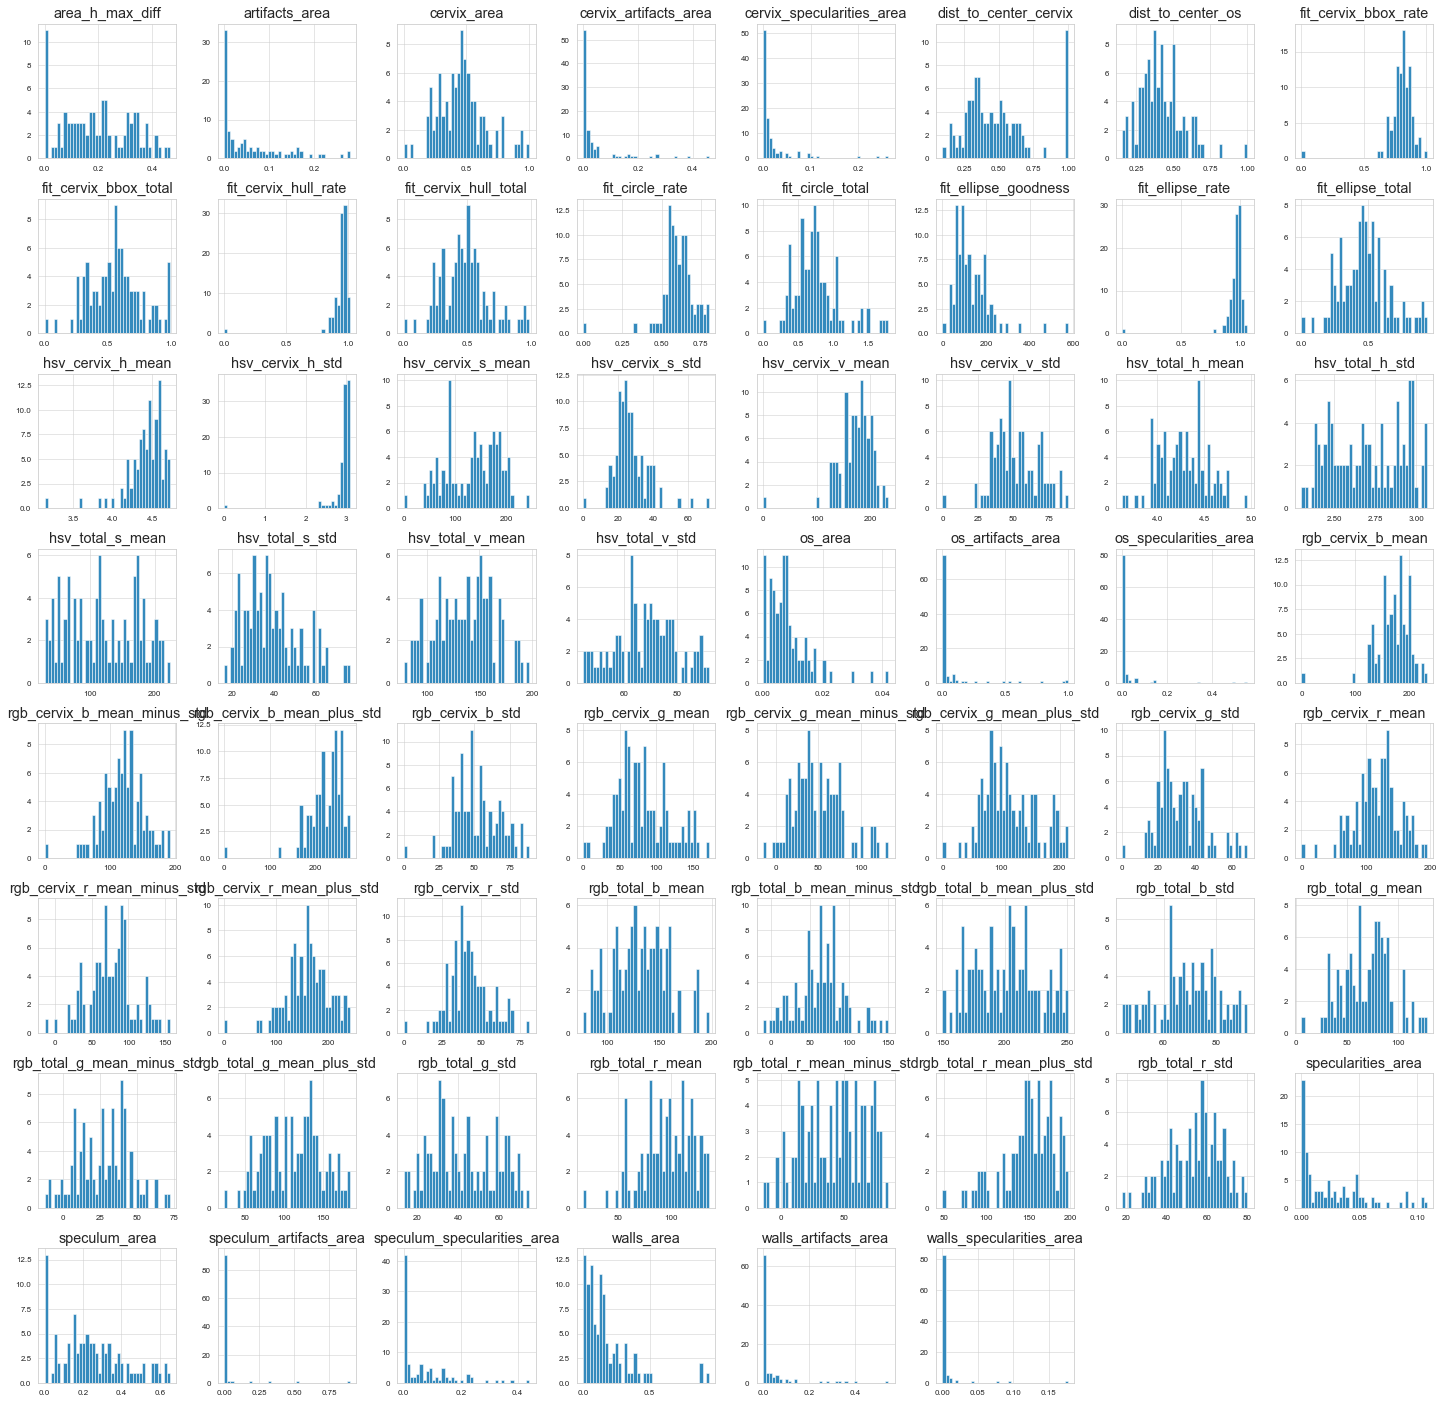

In [39]:
hinsel_df_num = hinsel_df.select_dtypes(include = ['float64'])
hinsel_df_num1 = hinsel_df_num.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'])
hinsel_df_num1.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

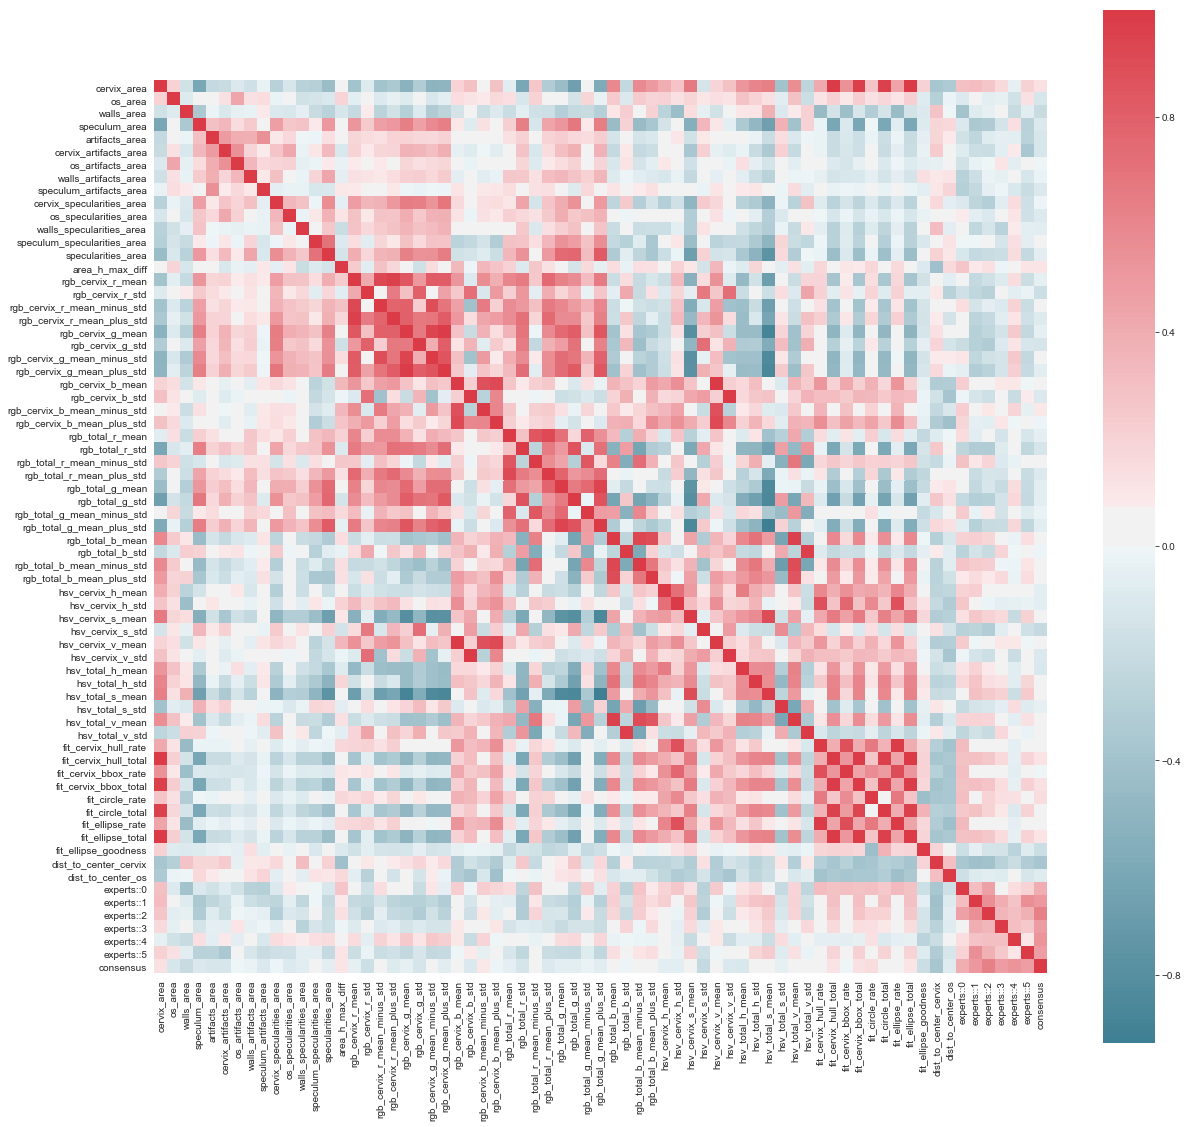

In [40]:
f, ax = plt.subplots(figsize=(20, 19))
corr = hinsel_df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
print (get_top_abs_correlations(hinsel_df,0.94))

rgb_cervix_b_std       hsv_cervix_v_std               0.998948
fit_cervix_hull_total  fit_ellipse_total              0.998892
rgb_cervix_b_mean      hsv_cervix_v_mean              0.998833
cervix_area            fit_cervix_hull_total          0.996026
                       fit_ellipse_total              0.995408
fit_cervix_bbox_total  fit_ellipse_total              0.985493
fit_cervix_hull_rate   fit_ellipse_rate               0.985050
fit_cervix_hull_total  fit_cervix_bbox_total          0.982735
rgb_cervix_g_mean      rgb_cervix_g_mean_plus_std     0.978320
cervix_area            fit_cervix_bbox_total          0.975045
rgb_total_b_std        hsv_total_v_std                0.962478
fit_cervix_hull_total  fit_circle_total               0.962167
rgb_total_b_mean       hsv_total_v_mean               0.961228
cervix_area            fit_circle_total               0.960600
fit_circle_total       fit_ellipse_total              0.960207
rgb_cervix_r_mean      rgb_cervix_r_mean_plus_std     0

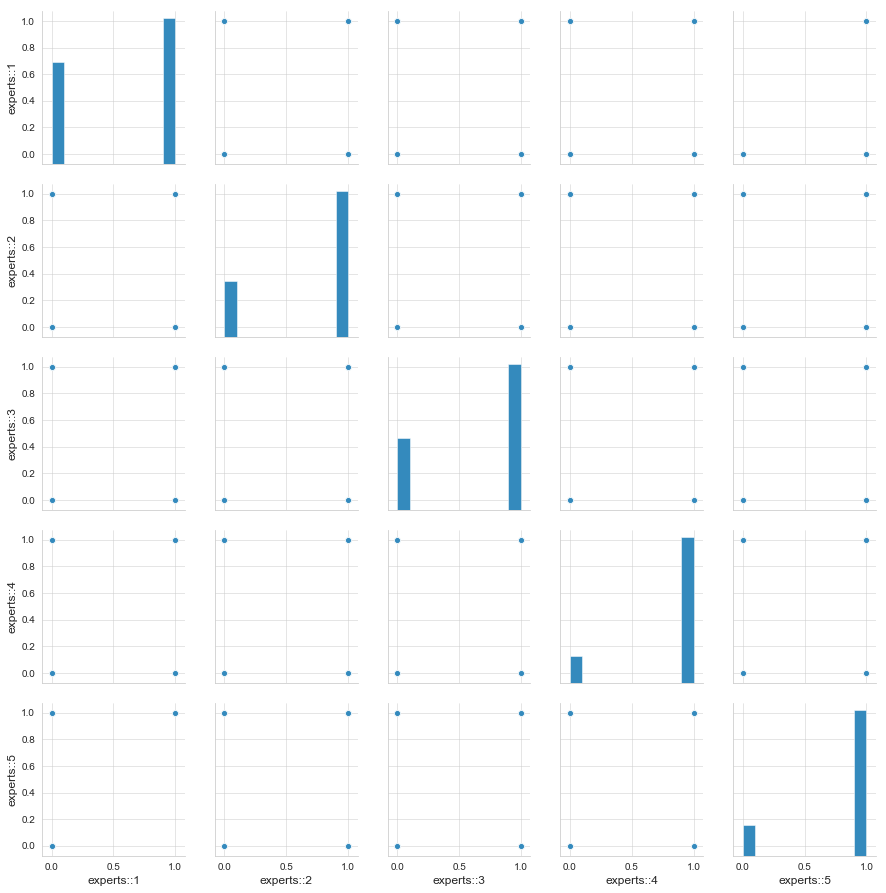

In [42]:
X=hinsel_df [['experts::1','experts::2','experts::3','experts::4','experts::5']]
sns.pairplot(X)

Ordinal variables, numeric but able to be ranked in categories. Numeric with a set possible of variables, so the vars are ordinal.Relation between the vars, non-linea relation.Distribution of each variable non-normal

#### Spearman Rank Correlation (Hinsel)


In [43]:
cons= hinsel_df ['consensus']
exp1= hinsel_df ['experts::1']
exp2= hinsel_df ['experts::2']
exp3= hinsel_df ['experts::3']
exp4= hinsel_df ['experts::4']
exp5= hinsel_df ['experts::5']

In [44]:
spearmanr_coefficient, p_value = spearmanr(cons,exp1)
print ('Spearman Rank Correlation(Expert 1 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 1 vs Consensus)0.511


In [45]:
spearmanr_coefficient, p_value = spearmanr(cons,exp2)
print ('Spearman Rank Correlation(Expert 2 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 2 vs Consensus)0.625


In [46]:
spearmanr_coefficient, p_value = spearmanr(cons,exp3)
print ('Spearman Rank Correlation(Expert 3 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 3 vs Consensus)0.488


In [47]:
spearmanr_coefficient, p_value = spearmanr(cons,exp4)
print ('Spearman Rank Correlation(Expert 4 vs Consensus)%0.3f' %(spearmanr_coefficient))


Spearman Rank Correlation(Expert 4 vs Consensus)0.527


In [48]:
spearmanr_coefficient, p_value = spearmanr(cons,exp5)
print ('Spearman Rank Correlation(Expert 5 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 5 vs Consensus)0.478


The statistical test reports a positive correlation with values:0.744,0,562,0.594,0.591,0.384. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

#### Chi-square test for independence

In [49]:
table=pd.crosstab(cons,exp1)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 22.498 p_value 0.000


In [50]:
table=pd.crosstab(cons,exp2)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 34.137 p_value 0.000


In [51]:
table=pd.crosstab(cons,exp3)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 20.343 p_value 0.000


In [52]:
table=pd.crosstab(cons,exp4)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 23.043 p_value 0.000


In [53]:
table=pd.crosstab(cons,exp5)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 18.807 p_value 0.000


P-value < 0.05 to conclude that the variables are independent of one another. Reject the null hypothesis and conclude variables are correlated.

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


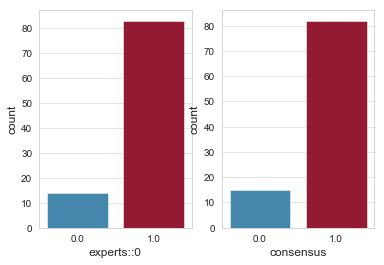

In [54]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::0', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


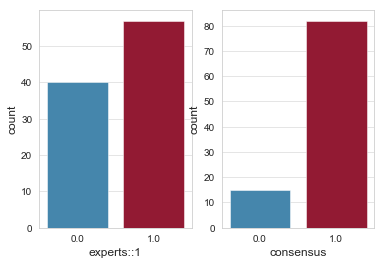

In [55]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::1', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


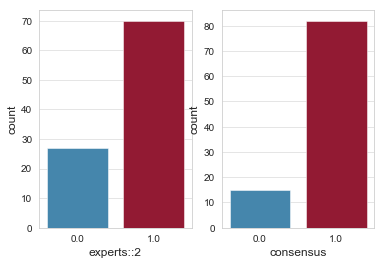

In [56]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::2', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


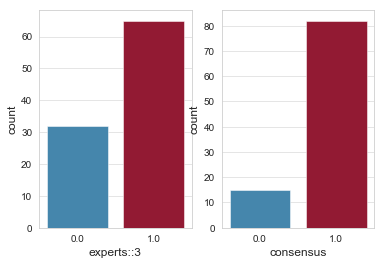

In [57]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::3', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


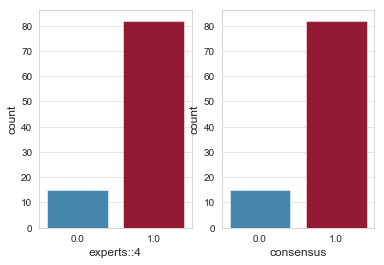

In [58]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::4', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


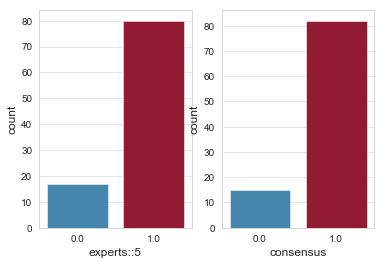

In [59]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::5', data=hinsel_df, ax=ax[0])
sns.countplot(x='consensus', data=hinsel_df, ax=ax[1])
fig.show()

In [60]:
datadict = pd.DataFrame(hinsel_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
datadict['MissingVal'] = hinsel_df.isnull().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=hinsel_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=hinsel_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

                            DataType  MissingVal  NUnique  Count
cervix_area                  float64           0       97     97
os_area                      float64           0       87     97
walls_area                   float64           0       87     97
speculum_area                float64           0       89     97
artifacts_area               float64           0       72     97
cervix_artifacts_area        float64           0       58     97
os_artifacts_area            float64           0       27     97
walls_artifacts_area         float64           0       40     97
speculum_artifacts_area      float64           0       41     97
cervix_specularities_area    float64           0       96     97
os_specularities_area        float64           0       42     97
walls_specularities_area     float64           0       46     97
speculum_specularities_area  float64           0       66     97
specularities_area           float64           0       97     97
area_h_max_diff          

In [87]:
hinsel_df.to_csv('./clean_data/clean_hinsel.csv', sep=',',index = False, header = hinsel_df.columns)

####  SCHILLER DATASET 

In [61]:
datadict = pd.DataFrame(schiller_df.dtypes)
# identify missing values of the 69 columns,add the stats to the datadict
schiller_df=schiller_df.replace('na',np.NaN)
datadict['MissingVal'] = schiller_df.isnull().sum()
# Identify number of unique values, For object nunique will the number of levels
datadict['NUnique']=schiller_df.nunique()
# Identify the count for each variable, add the stats to datadict
datadict['Count']=schiller_df.count()
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
print(datadict)

                            DataType  MissingVal  NUnique  Count
cervix_area                  float64           0       82     92
os_area                      float64           0       81     92
walls_area                   float64           0       77     92
speculum_area                float64           0       75     92
artifacts_area               float64           0       90     92
cervix_artifacts_area        float64           0       84     92
os_artifacts_area            float64           0       26     92
walls_artifacts_area         float64           0       37     92
speculum_artifacts_area      float64           0       33     92
cervix_specularities_area    float64           0       88     92
os_specularities_area        float64           0       37     92
walls_specularities_area     float64           0       60     92
speculum_specularities_area  float64           0       71     92
specularities_area           float64           0       92     92
area_h_max_diff          

From these informations we can already see that all the features are relevant in our exploratory analysis as there aren´t any missing values.

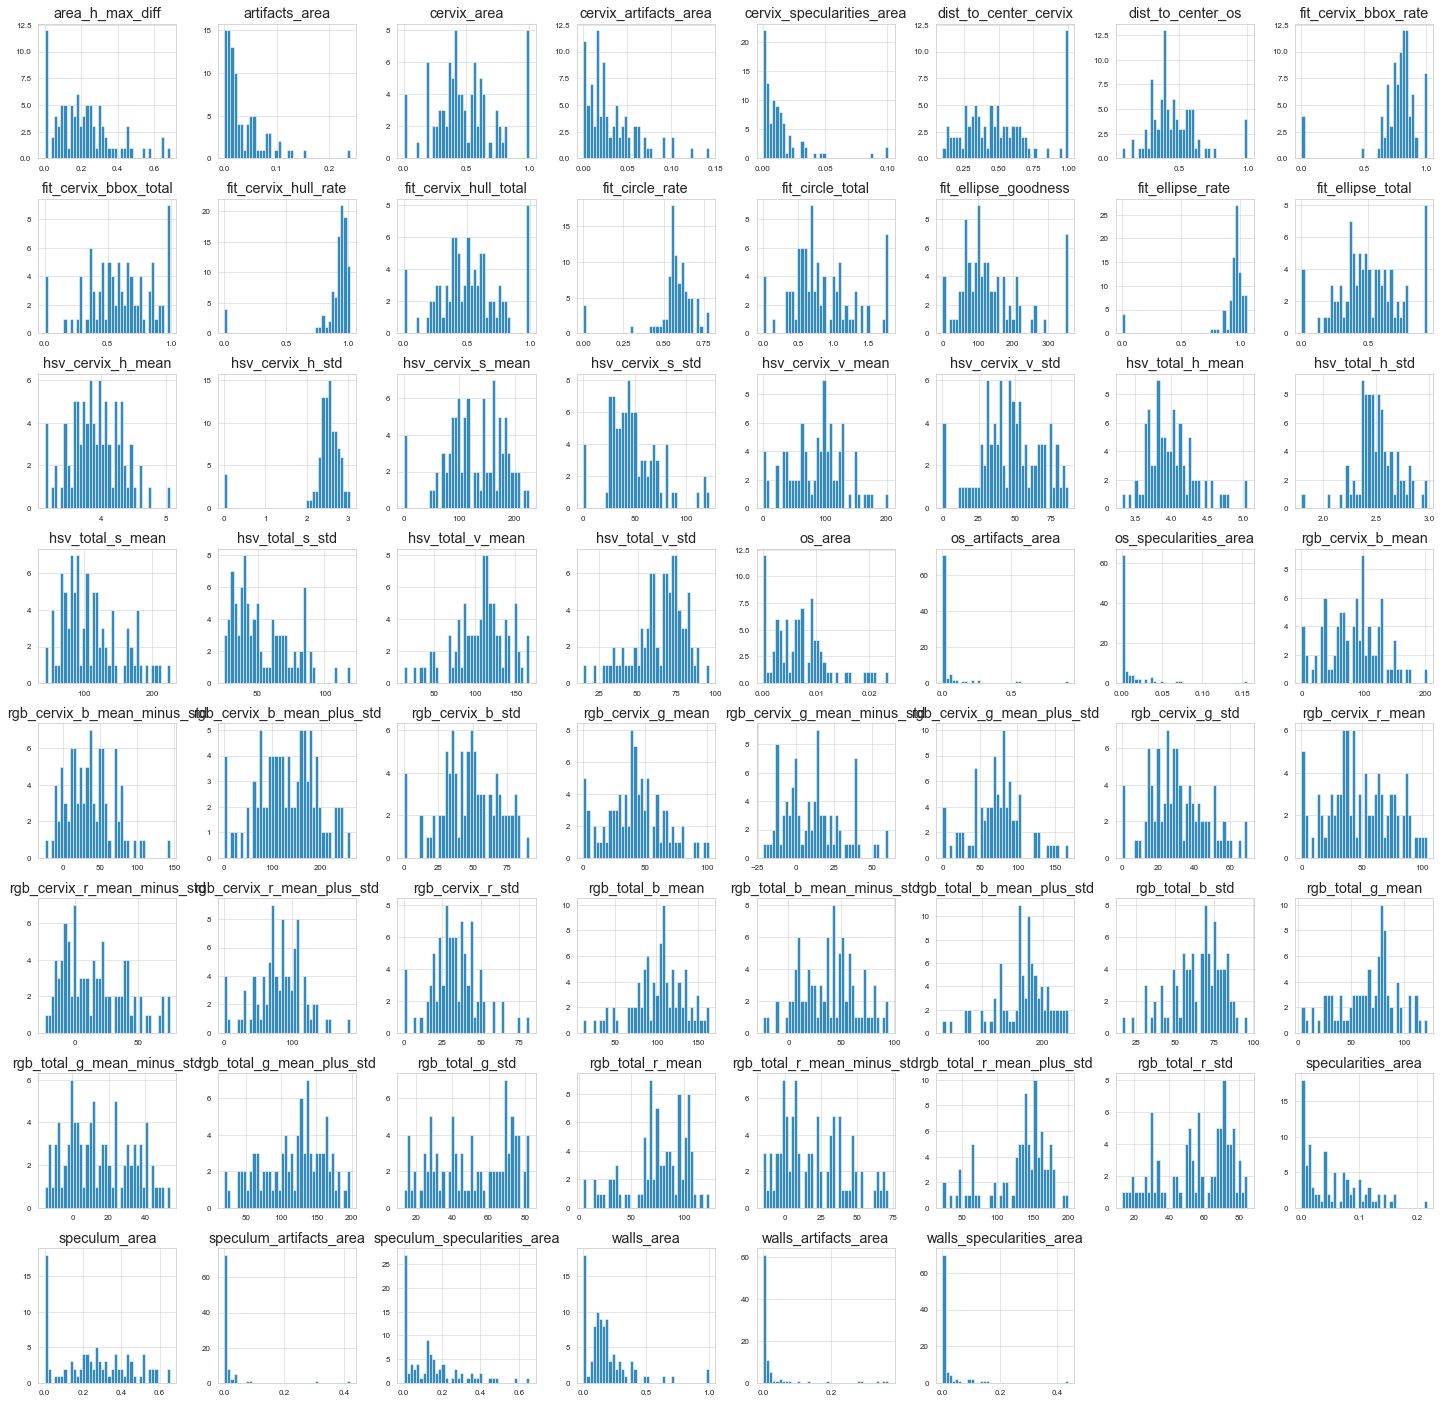

In [62]:
schiller_df_num = schiller_df.select_dtypes(include = ['float64'])
schiller_df_num1 = schiller_df_num.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'])
schiller_df_num1.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

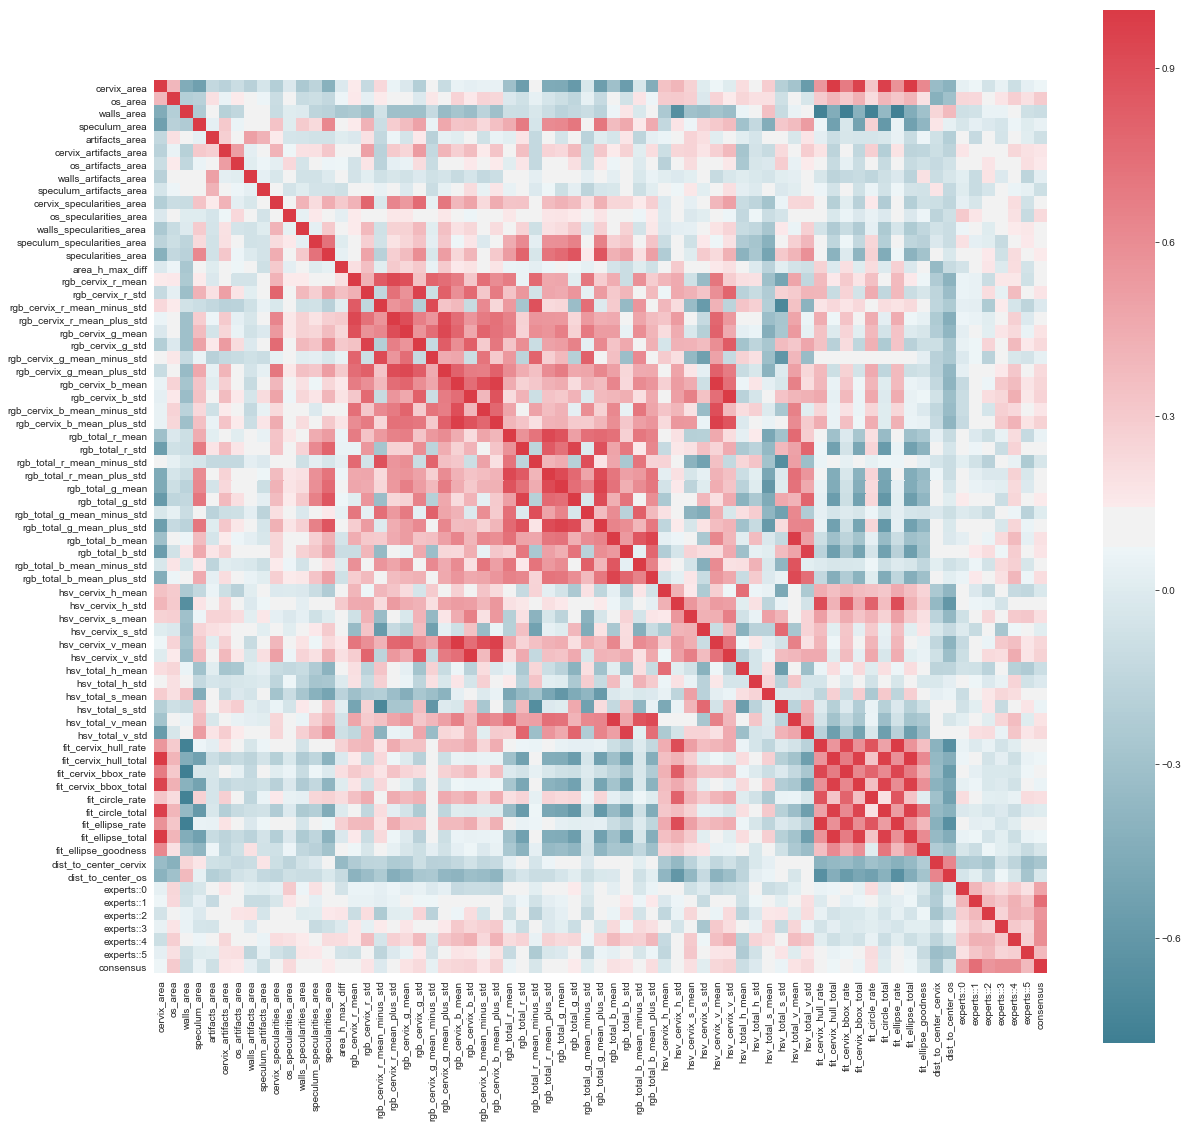

In [63]:
f, ax = plt.subplots(figsize=(20, 19))
corr = schiller_df.corr()

sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [64]:
print (get_top_abs_correlations(schiller_df,0.94))

fit_cervix_hull_total       fit_ellipse_total             0.998691
rgb_cervix_b_mean           hsv_cervix_v_mean             0.997781
rgb_cervix_b_std            hsv_cervix_v_std              0.995456
fit_cervix_hull_rate        fit_ellipse_rate              0.994679
cervix_area                 fit_cervix_hull_total         0.994524
                            fit_ellipse_total             0.994016
rgb_total_b_mean            hsv_total_v_mean              0.984239
fit_cervix_bbox_total       fit_ellipse_total             0.977315
rgb_cervix_b_mean           rgb_cervix_b_mean_plus_std    0.974532
fit_cervix_hull_total       fit_cervix_bbox_total         0.974430
                            fit_circle_total              0.972579
cervix_area                 fit_circle_total              0.971002
fit_circle_total            fit_ellipse_total             0.970795
rgb_cervix_b_mean_plus_std  hsv_cervix_v_mean             0.970761
rgb_total_b_std             hsv_total_v_std               0.96

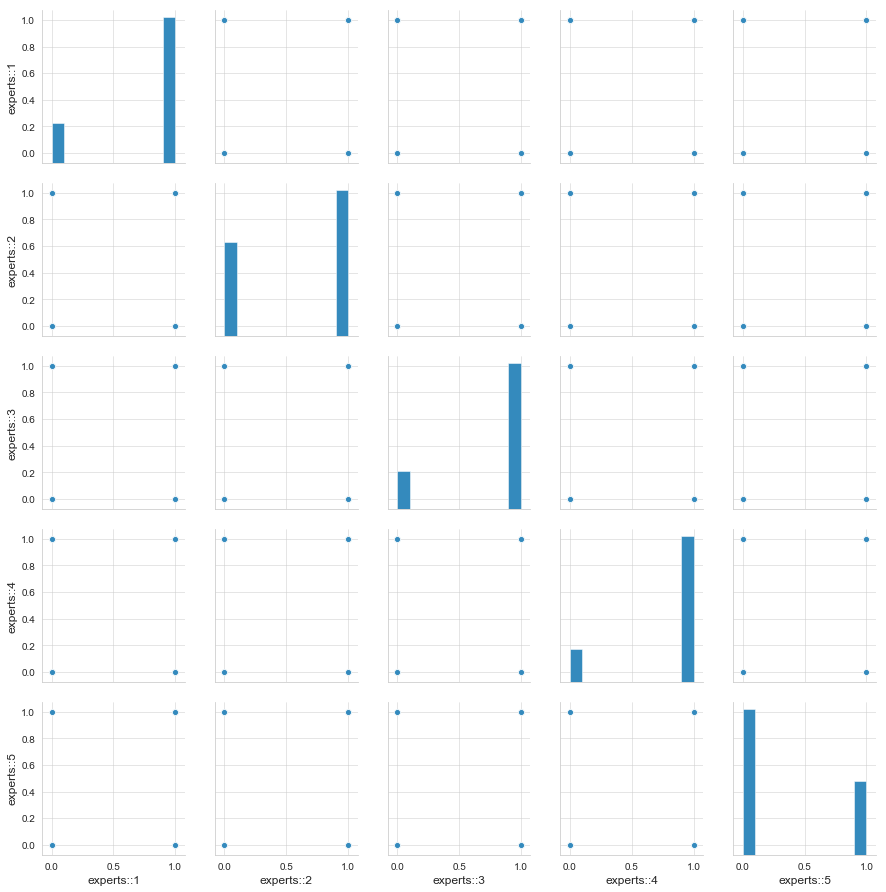

In [65]:
X=schiller_df [['experts::1','experts::2','experts::3','experts::4','experts::5']]
sns.pairplot(X)

Ordinal variables, numeric but able to be ranked in categories. Numeric with a set possible of variables, so the vars are ordinal.Relation between the vars, non-linea relation.Distribution of each variable non-normal

#### Spearman Rank Correlation (Schiller)

In [66]:
cons= schiller_df ['consensus']
exp1= schiller_df ['experts::1']
exp2= schiller_df ['experts::2']
exp3= schiller_df ['experts::3']
exp4= schiller_df ['experts::4']
exp5= schiller_df ['experts::5']

In [67]:
spearmanr_coefficient, p_value = spearmanr(cons,exp1)
print ('Spearman Rank Correlation(Expert 1 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 1 vs Consensus)0.744


In [68]:
spearmanr_coefficient, p_value = spearmanr(cons,exp2)
print ('Spearman Rank Correlation(Expert 2 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 2 vs Consensus)0.562


In [69]:
spearmanr_coefficient, p_value = spearmanr(cons,exp3)
print ('Spearman Rank Correlation(Expert 3 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 3 vs Consensus)0.594


In [70]:
spearmanr_coefficient, p_value = spearmanr(cons,exp4)
print ('Spearman Rank Correlation(Expert 4 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 4 vs Consensus)0.591


In [71]:
spearmanr_coefficient, p_value = spearmanr(cons,exp5)
print ('Spearman Rank Correlation(Expert 5 vs Consensus)%0.3f' %(spearmanr_coefficient))

Spearman Rank Correlation(Expert 5 vs Consensus)0.384


The statistical test reports a positive correlation with values:0.744,0,562,0.594,0.591,0.384. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

#### Chi-square test for independence (Schiller)

In [72]:
table=pd.crosstab(cons,exp1)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 46.996 p_value 0.000


In [73]:
table=pd.crosstab(cons,exp2)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 26.487 p_value 0.000


In [74]:
table=pd.crosstab(cons,exp3)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 29.220 p_value 0.000


In [75]:
table=pd.crosstab(cons,exp4)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 28.755 p_value 0.000


In [76]:
table=pd.crosstab(cons,exp5)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 11.786 p_value 0.001


P-value < 0.05 to conclude that the variables are independent of one another. Reject the null hypothesis and conclude variables are correlated.

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


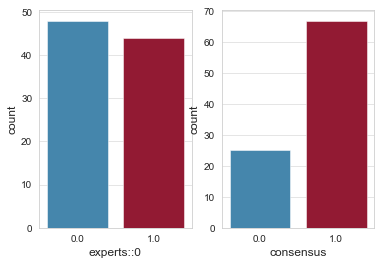

In [77]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::0', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


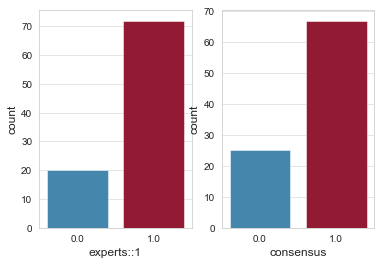

In [78]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::1', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


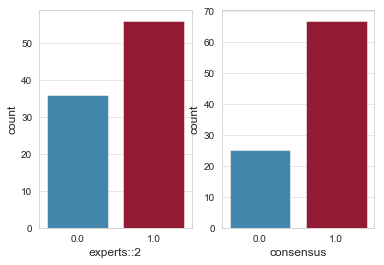

In [79]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::2', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


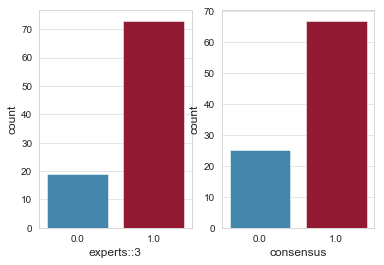

In [80]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::3', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


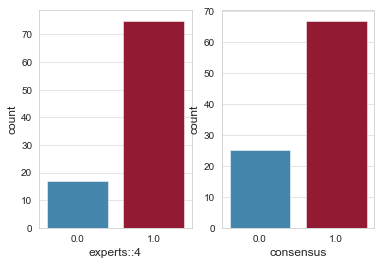

In [81]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::4', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


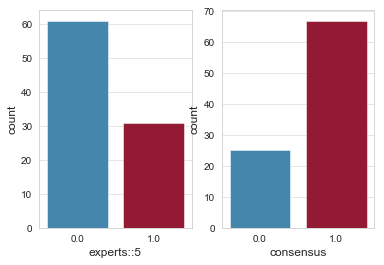

In [82]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='experts::5', data=schiller_df, ax=ax[0])
sns.countplot(x='consensus', data=schiller_df, ax=ax[1])
fig.show()

In [88]:
schiller_df.to_csv('./clean_data/clean_schiller.csv', sep=',',index = False, header = schiller_df.columns)

#### GREEN VS HINSEL

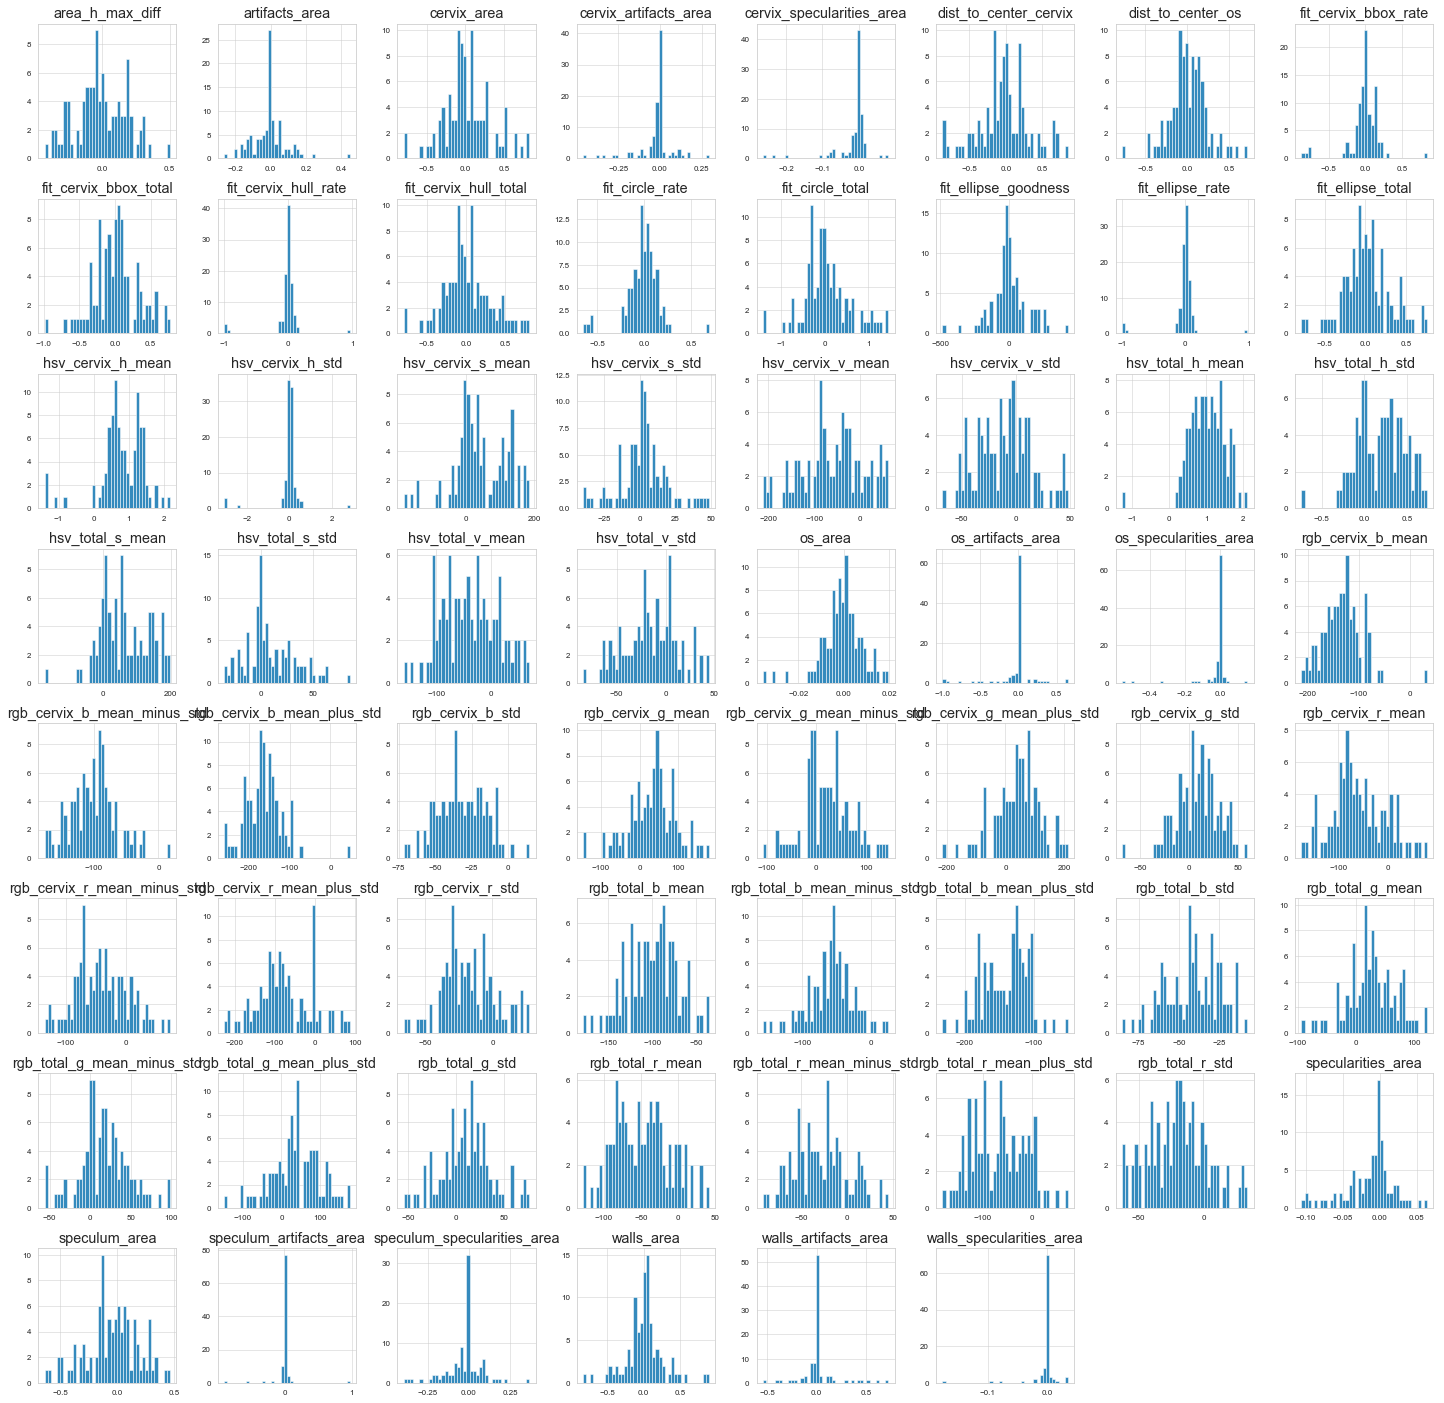

In [83]:
diff_df_num = green_df_num1- hinsel_df_num1
diff_df_num.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

#### GREEN VS SCHILLER

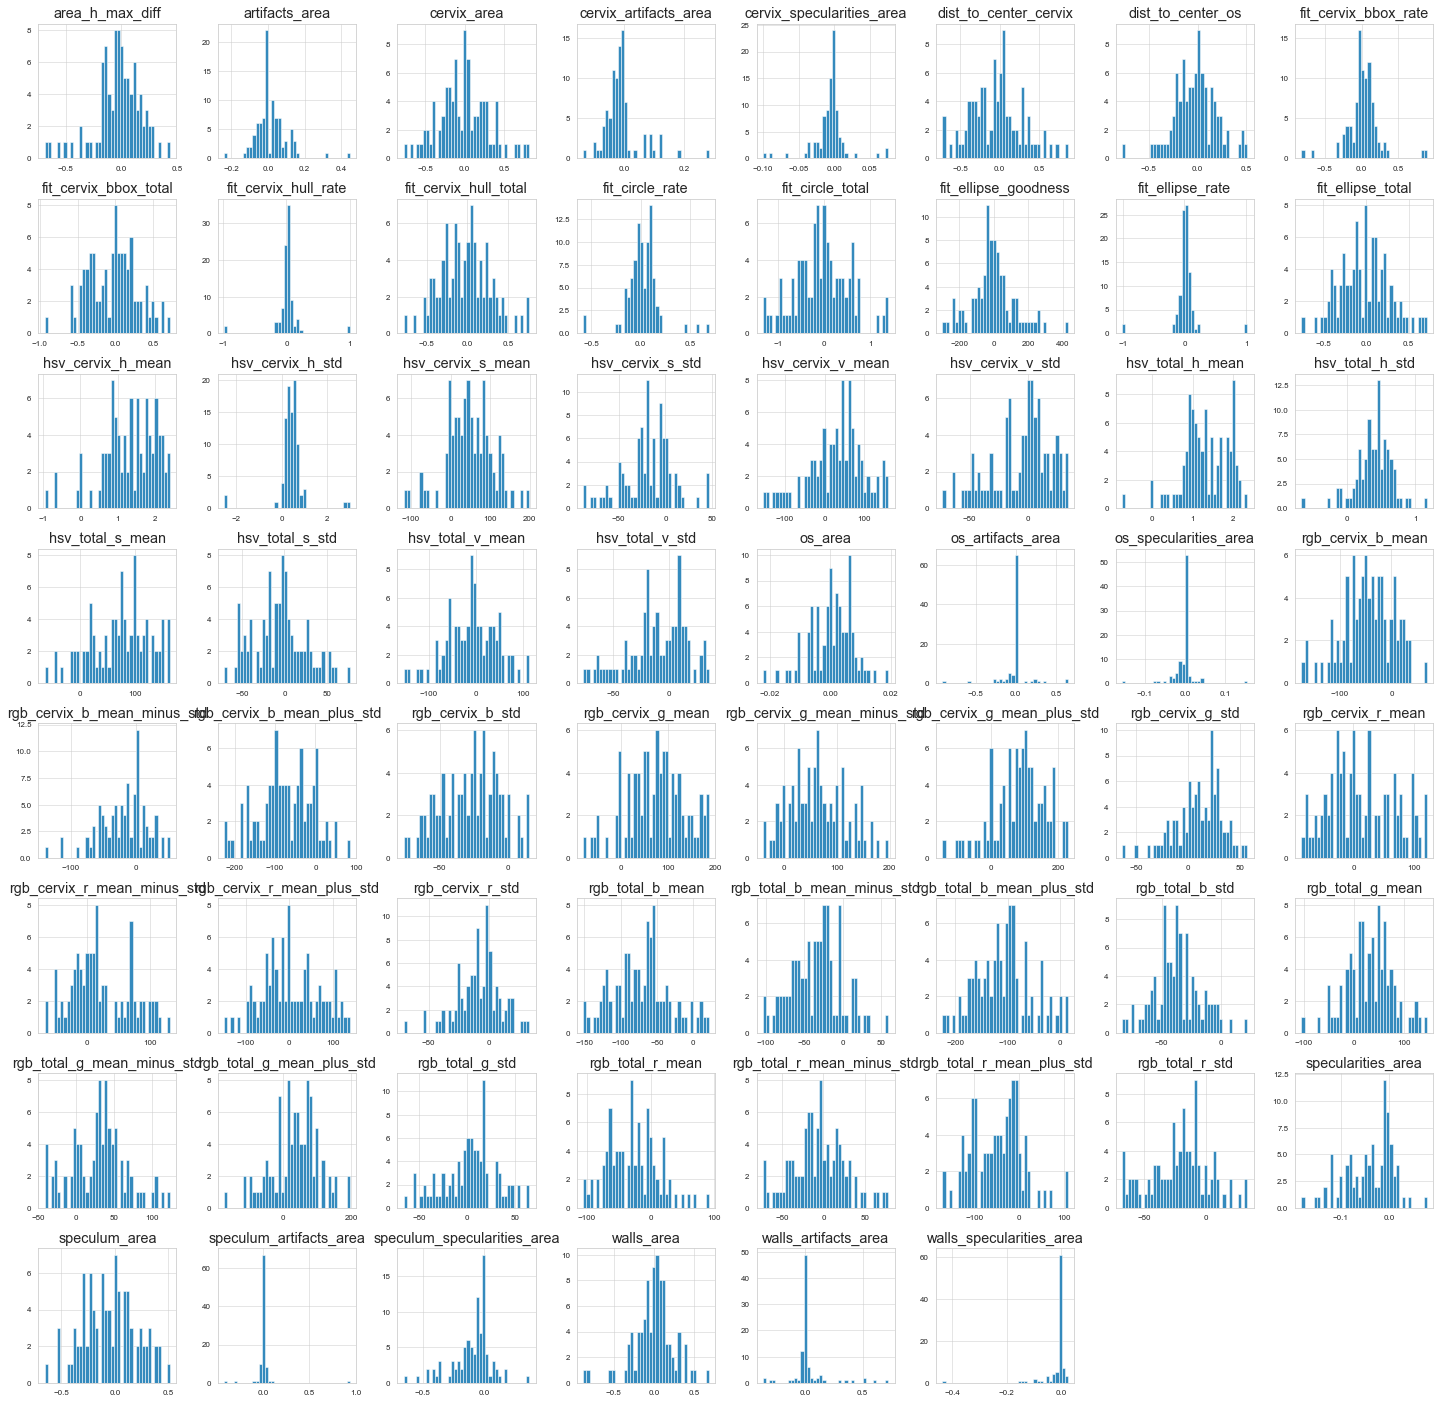

In [84]:
diff_df_num = green_df_num1- schiller_df_num1
diff_df_num.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);

#### HINSEL VS SCHILLER

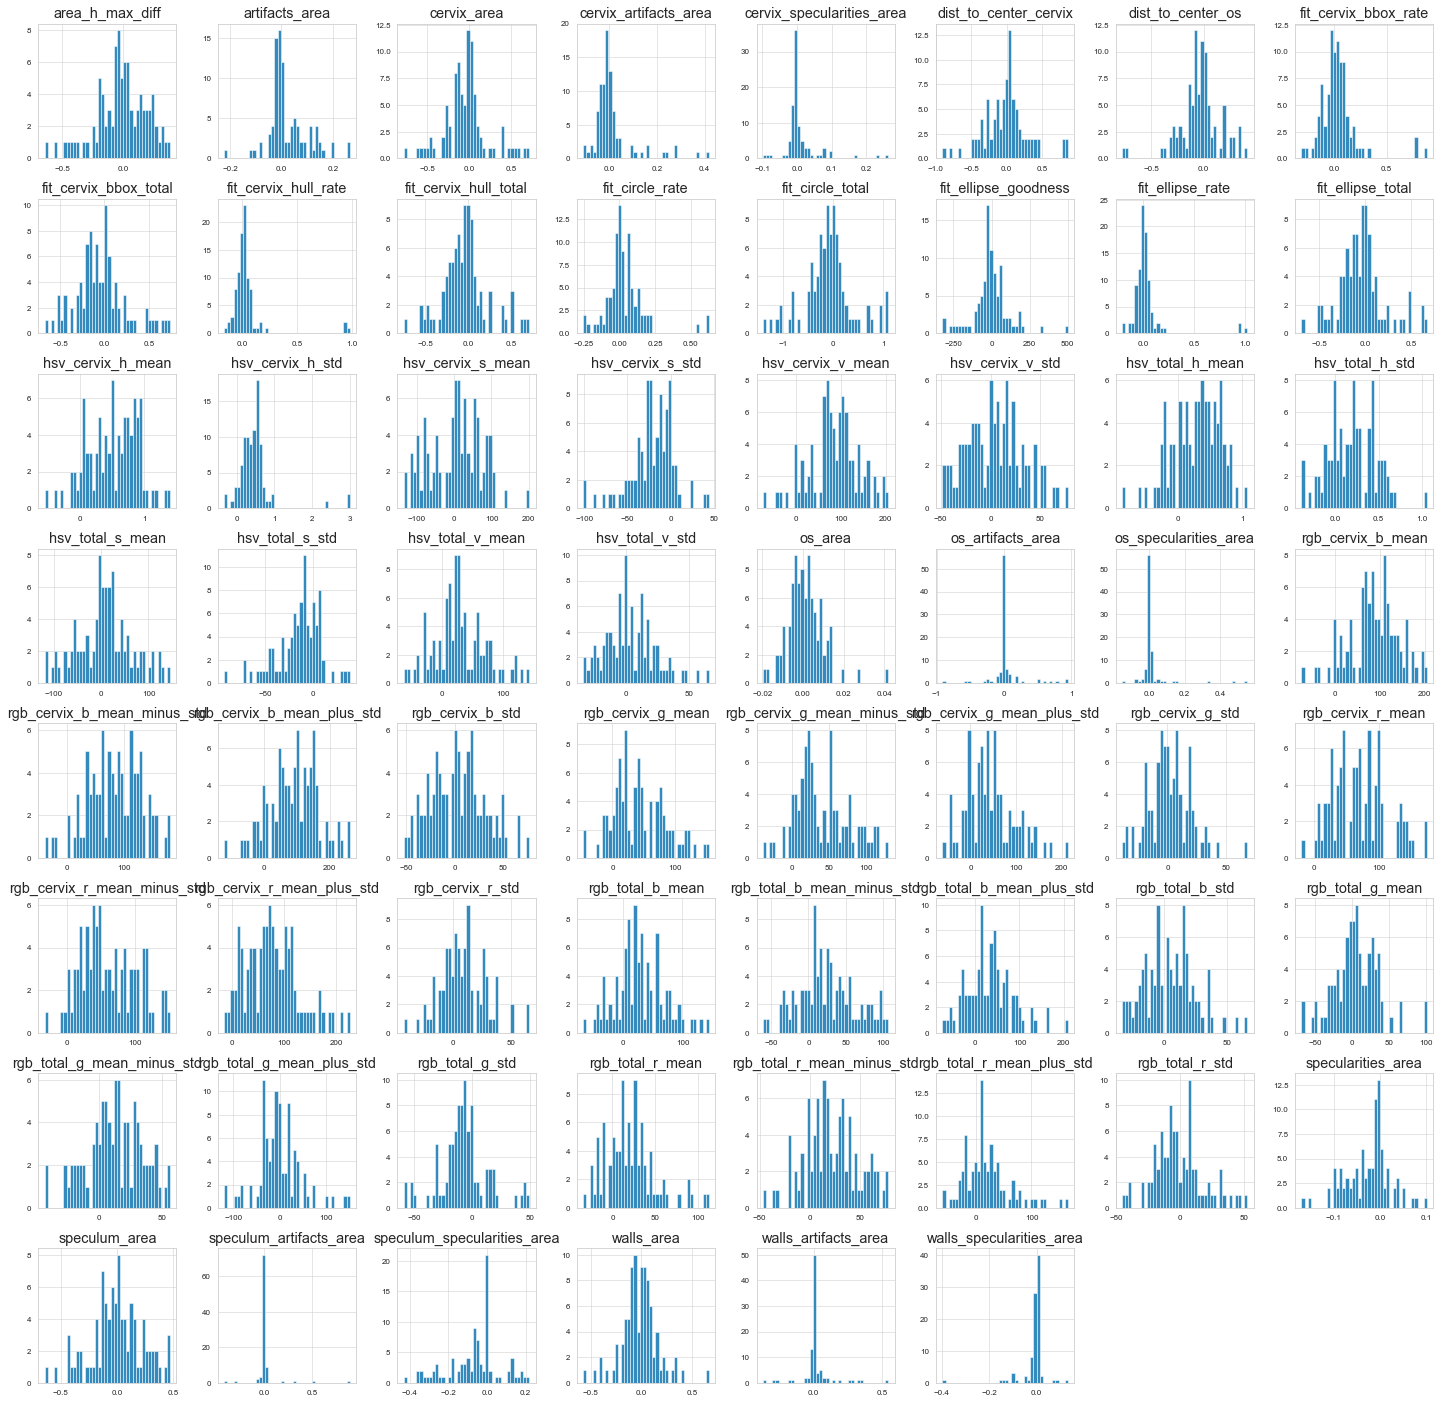

In [85]:
diff_df_num = hinsel_df_num1- schiller_df_num1
diff_df_num.hist(figsize=(25, 25), bins=40, xlabelsize=8, ylabelsize=8);